# Exploratary Data Analysis on [Bank_marketing_Dataset]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
bank = pd.read_csv(r"C:\\Users\\kumar\\OneDrive\\Desktop\\bank_marketing_updated_v1.csv")
bank.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


## Data Cleaning

In [3]:
bank = pd.read_csv(r"C:\\Users\\kumar\\OneDrive\\Desktop\\bank_marketing_updated_v1.csv",skiprows= 2)
bank.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


-- Droping Customer_id

In [4]:
bank = bank.drop(["customerid"],axis =1)
bank.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [5]:
bank.shape

(45211, 18)

In [6]:
bank.isnull().sum()

age         20
salary       0
balance      0
marital      0
jobedu       0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month       50
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response    30
dtype: int64

In [7]:
bank["age"].isnull().sum()/45211*100

0.0442370219636814

In [8]:
bank["month"].isnull().sum()/45211*100

0.11059255490920351

In [9]:
bank["response"].isnull().sum()/45211*100

0.0663555329455221

In [10]:
bank.describe()

,age,salary,balance,day,campaign,pdays,previous
count,45191.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.935651,57006.171065,1362.272058,15.806419,2.763841,40.197828,0.580323
std,10.619198,32085.718415,3044.765829,8.322476,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


# dividing jobedu into Job and education

In [11]:
bank["job"] = bank.jobedu.apply(lambda X: X.split(",")[0])
bank.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown


In [12]:
bank["eduaction"] = bank.jobedu.apply(lambda X: X.split(",")[1])
bank.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,eduaction
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


## droping jobedu column

In [13]:
bank = bank.drop("jobedu",axis = 1)
bank.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,eduaction
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


## Handling Missing Values

In [14]:
bank0 = bank[~bank.age.isnull()]

In [15]:
bank0.age.isnull().sum()

0

### Handling Missing in months

In [16]:
bank0 = bank[~bank.month.isnull()]

In [17]:
bank0.month.isnull().sum()

0

In [18]:
bank0.pdays.describe()

count    45161.000000
mean        40.209141
std        100.143976
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

#### - 1 indicate these are missing values

In [19]:
bank0.loc[bank0.pdays<0,"pdays"] = np.NaN
bank0.pdays.describe()

count    8250.000000
mean      224.581333
std       115.359519
min         1.000000
25%       133.000000
50%       194.500000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

## Handling outliers

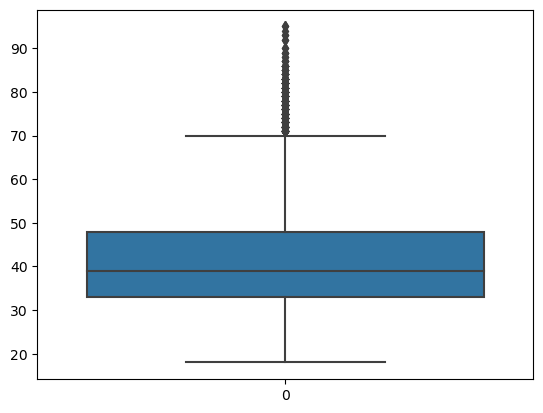

In [20]:
sns.boxplot(bank0.age)
plt.show()

### There are no outliers in age column

#### Look at balance column

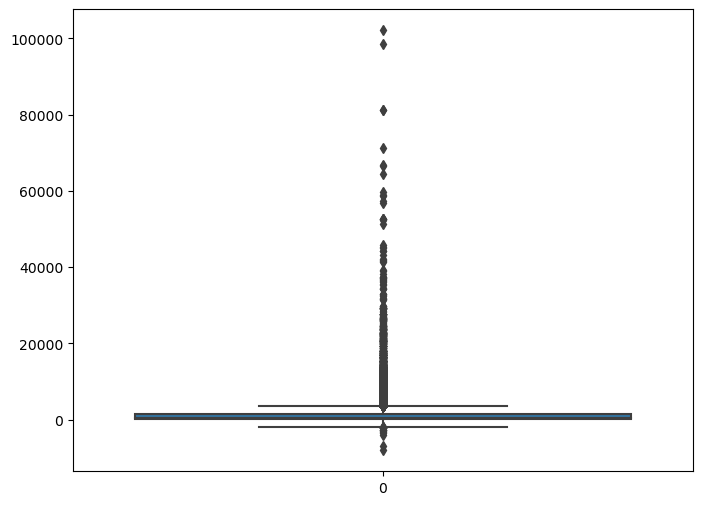

In [21]:
plt.figure(figsize= (8,6))

sns.boxplot(bank0.balance)
plt.show()

# Standardize The data

In [22]:
bank0.duration.describe()

count       45161
unique       2644
top       1.5 min
freq          138
Name: duration, dtype: object

In [23]:
bank0.duration = bank0.duration.apply(lambda x: float(x.split()[0])/60 if x.find("sec")>0 else float(x.split()[0]))


In [24]:
bank0.duration.describe()

count    45161.000000
mean         4.302654
std          4.290641
min          0.000000
25%          1.716667
50%          3.000000
75%          5.316667
max         81.966667
Name: duration, dtype: float64

In [25]:
bank0.dtypes

age          float64
salary         int64
balance        int64
marital       object
targeted      object
default       object
housing       object
loan          object
contact       object
day            int64
month         object
duration     float64
campaign       int64
pdays        float64
previous       int64
poutcome      object
response      object
job           object
eduaction     object
dtype: object

## Univariate analysis - Categorical feature
### Marital

In [26]:
bank0.marital.value_counts()

married     27183
single      12774
divorced     5204
Name: marital, dtype: int64

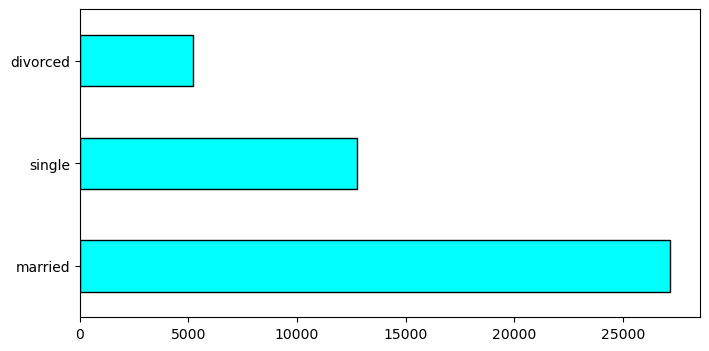

In [27]:
plt.figure(figsize = (8,4))


bank0.marital.value_counts().plot.barh(color = "cyan",edgecolor = "black")
plt.show()

In [28]:
bank0.targeted.value_counts()

yes    37054
no      8107
Name: targeted, dtype: int64

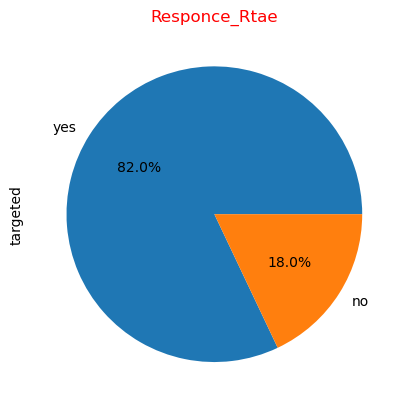

In [29]:
bank0.targeted.value_counts().plot.pie(autopct = "%1.1f%%")
plt.title("Responce_Rtae",color = "Red")
plt.show()

In [30]:
bank0.eduaction.value_counts()

secondary    23184
tertiary     13283
primary       6842
unknown       1852
Name: eduaction, dtype: int64

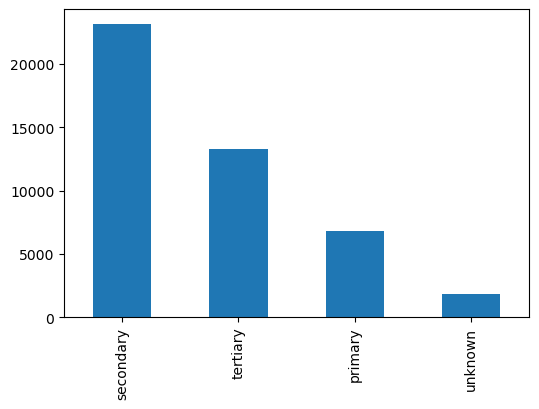

In [31]:
plt.figure(figsize = (6,4))

bank0.eduaction.value_counts().plot.bar()
plt.show()

In [32]:
bank0.poutcome.value_counts()

unknown    36916
failure     4897
other       1840
success     1508
Name: poutcome, dtype: int64

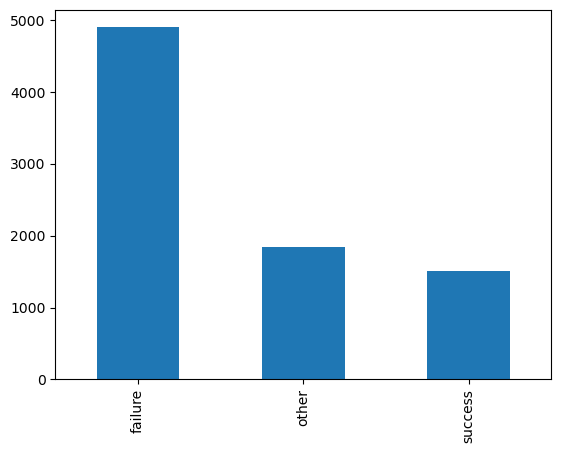

In [33]:
bank0[~(bank0.poutcome=="unknown")].poutcome.value_counts().plot.bar()
plt.show()

# The target varible [Response]

In [34]:
bank0.response.value_counts()

no     39850
yes     5281
Name: response, dtype: int64

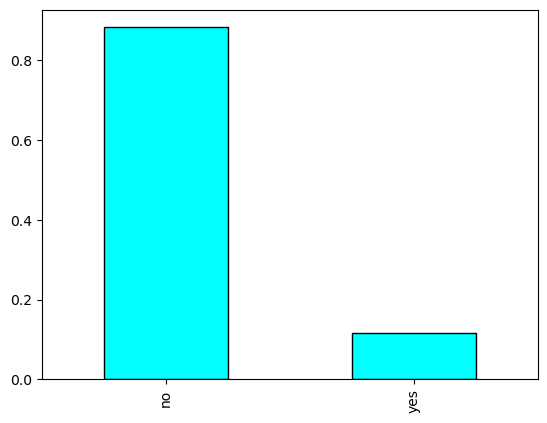

In [35]:
bank0.response.value_counts(normalize = True).plot.bar(color = "cyan",edgecolor = "black")
plt.show()

# Bivariate Analysis

In [36]:
bank0.columns

Index(['age', 'salary', 'balance', 'marital', 'targeted', 'default', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'response', 'job', 'eduaction'],
      dtype='object')

In [54]:
bank0.groupby("response")["age"].mean()

response
no     40.841635
yes    41.668119
Name: age, dtype: float64

## Quantify Correlation Values

In [57]:
bank0[["age","salary","balance"]].corr()*100

,age,salary,balance
age,100.000000,2.441928,9.784670
salary,2.441928,100.000000,5.518726
balance,9.784670,5.518726,100.000000


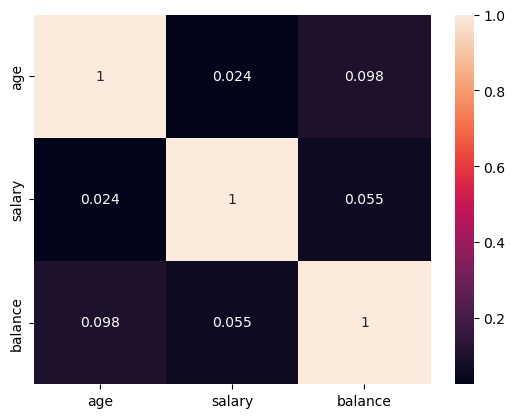

In [58]:
sns.heatmap(bank0[["age","salary","balance"]].corr(),annot = True)
plt.show()

# Categorical to Numerical

In [62]:
bank0.groupby("response")["salary"].quantile(0.75)

response
no      70000.0
yes    100000.0
Name: salary, dtype: float64

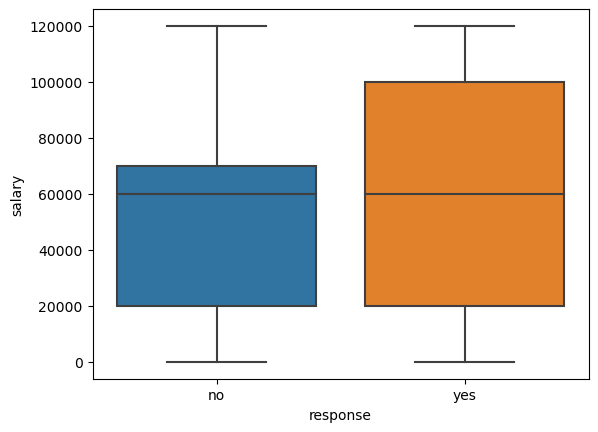

In [63]:
sns.boxplot(data = bank0,x = "response",y = "salary")
plt.show()

### Response vs Balance

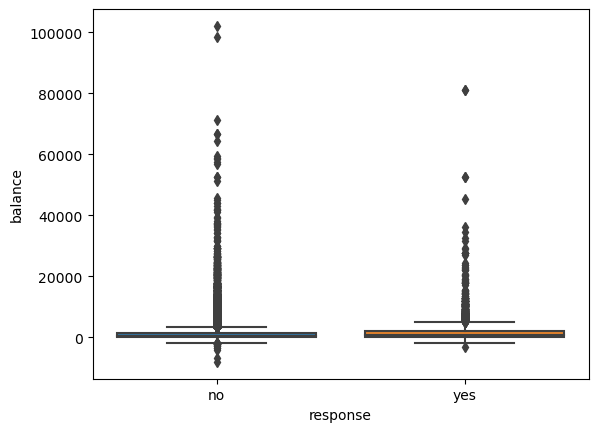

In [65]:
sns.boxplot(data = bank0,x = "response",y = "balance")
plt.show()

In [67]:
bank0.groupby("response")["balance"].mean()

response
no     1303.653601
yes    1805.514865
Name: balance, dtype: float64

In [68]:
bank0.groupby("response")["balance"].median()

response
no     417.0
yes    733.0
Name: balance, dtype: float64

### 75th percentile

In [69]:
bank0.groupby("response")["balance"].quantile(0.75)

response
no     1345.0
yes    2160.0
Name: balance, dtype: float64

# Categorical to Categorical

In [70]:
bank0.response.value_counts()

no     39850
yes     5281
Name: response, dtype: int64

In [77]:
bank0["response_flag"] = np.where(bank0.response=="yes",1,0)

In [78]:
bank0["response_flag"].value_counts()

0    39880
1     5281
Name: response_flag, dtype: int64

In [80]:
bank0["response_flag"].value_counts(normalize = True)*100

0    88.306282
1    11.693718
Name: response_flag, dtype: float64

In [84]:
bank0.groupby("eduaction")["response_flag"].mean()*100

eduaction
primary       8.623210
secondary    10.559006
tertiary     14.989084
unknown      13.606911
Name: response_flag, dtype: float64

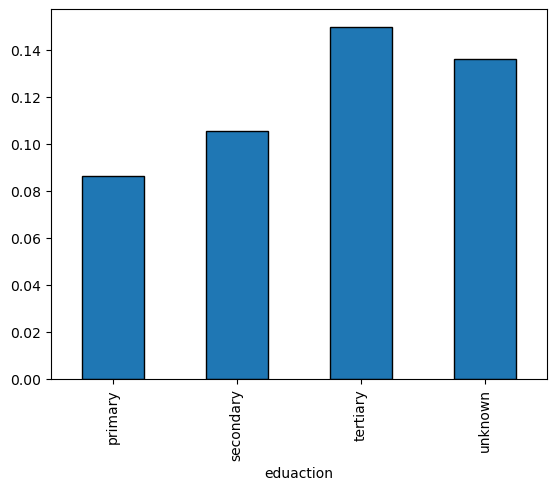

In [88]:
bank0.groupby("eduaction")["response_flag"].mean().plot.bar(edgecolor = "black")
plt.show()

## We Found that as Education level increase response rate is also increase

In [96]:
bank0.groupby("marital")["response_flag"].mean()*100

marital
divorced    11.933128
married     10.123975
single      14.936590
Name: response_flag, dtype: float64

## Single People are more likely to say yes for Term deposit

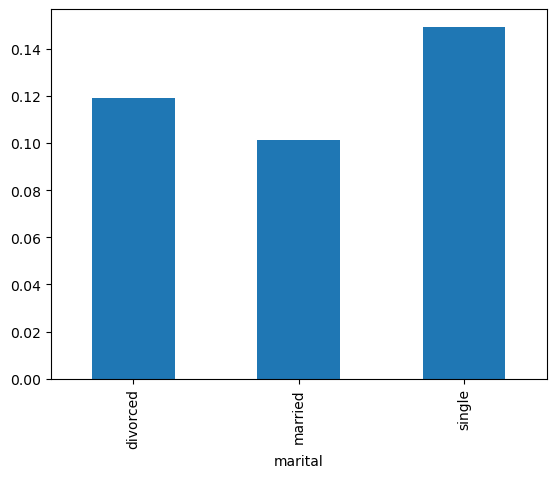

In [94]:
bank0.groupby("marital")["response_flag"].mean().plot.bar()
plt.show()

In [98]:
bank0.groupby("loan")["response_flag"].mean()*100

loan
no     12.650316
yes     6.684160
Name: response_flag, dtype: float64

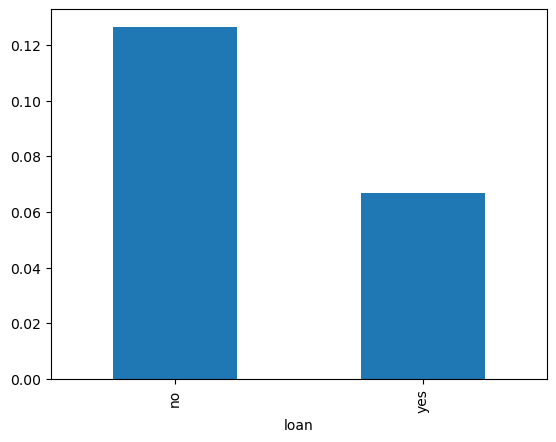

In [100]:
bank0.groupby("loan")["response_flag"].mean().plot.bar()
plt.show()

### Age vs Responce
### making bucket for age column

In [101]:
bank0["age_bucket"] = pd.cut(bank0.age,[0,30,40,50,60,9999],labels = ["<30","30-40","40-50","50-60","60+"])

In [103]:
bank0["age_bucket"].value_counts(normalize = True)

30-40    0.391152
40-50    0.248643
50-60    0.178397
<30      0.155491
60+      0.026318
Name: age_bucket, dtype: float64

In [105]:
bank0.groupby("age_bucket")["response_flag"].mean()

age_bucket
<30      0.162844
30-40    0.102452
40-50    0.090699
50-60    0.100211
60+      0.422559
Name: response_flag, dtype: float64

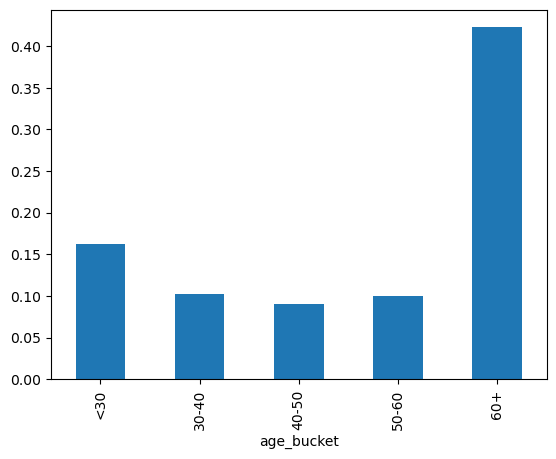

In [106]:
bank0.groupby("age_bucket")["response_flag"].mean().plot.bar()
plt.show()